1. Load the cleaned dataset from the last exercise. If you haven't saved the dataset, rerun the exercise and save the final dataset.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv("df.csv")
df

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore,Gender_male,LunchType_standard
0,female,2,1,standard,1,1,1,10,3.0,1,1,71,71,74,0,1
1,female,2,5,standard,1,1,2,10,0.0,2,0,69,90,88,0,1
2,female,1,3,standard,1,2,2,10,4.0,1,1,87,93,91,0,1
3,male,0,0,free/reduced,1,1,0,3,1.0,2,0,45,56,42,1,0
4,male,2,5,standard,1,1,2,10,0.0,1,0,76,78,75,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29112,female,3,2,standard,1,2,2,3,2.0,1,0,59,61,65,0,1
29113,male,4,2,standard,1,2,1,3,1.0,0,0,58,53,51,1,1
29114,female,2,2,free/reduced,0,1,2,3,1.0,0,0,61,70,67,0,0
29115,female,3,0,standard,0,1,1,3,3.0,1,0,82,90,93,0,1


2. a) Find the mean, median and average scores in mathematics, reading and writing. <br>
   b) Find the mean, median and average scores for males and females.<br>
   c) What is the coefficient of variation of the scores? <br>

In [2]:
mean_score=df[['MathScore','ReadingScore','WritingScore']].mean()
median_score=df[['MathScore','ReadingScore','WritingScore']].median()

print('Mean score:',mean_score)
print('Median score:',median_score)

std_scores = df[['MathScore', 'ReadingScore', 'WritingScore']].std()
mean_scores = df[['MathScore', 'ReadingScore', 'WritingScore']].mean()
cv_scores = (std_scores / mean_scores) * 100

print("Coefficient of variation for scores:")
print(cv_scores)



Mean score: MathScore       66.559948
ReadingScore    69.390081
WritingScore    68.429337
dtype: float64
Median score: MathScore       67.0
ReadingScore    70.0
WritingScore    69.0
dtype: float64
Coefficient of variation for scores:
MathScore       23.053283
ReadingScore    21.271326
WritingScore    22.574845
dtype: float64


3. a) Use a statistical test to test the hypothesis:<br>
H0: the mean mathematical scores of females and males are equal.



In [3]:
from statsmodels.stats.weightstats import ztest as ztest

female = df.query('Gender == "female"')
male = df.query('Gender == "male"')

female_sample = female.sample(n=100, random_state=1)
male_sample = male.sample(n=100, random_state=1)

from scipy.stats import f_oneway
stat, p = f_oneway(female_sample['MathScore'],male_sample['MathScore'])
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably the same distribution')
else:
    print('Probably different distributions')

stat=16.169, p=0.000
Probably different distributions


4. a) Use a statistical test to test the hypothesis:<br>
   H0 Gender did not affect the writing scores.<br>
   H1 Gender affected the writing score.<br>

In [12]:
from scipy import stats
male=df.Gender_male==1
male_scores=df.loc[male,'WritingScore']
female_scores=df.loc[~male,'WritingScore']
p_value=stats.ttest_ind(male_scores,female_scores)
print("P-value:", p_value)





P-value: TtestResult(statistic=-52.01694529394566, pvalue=0.0, df=29115.0)


5. a) Statisticaly test the distribuitions of female and male scores across the three scores columns.<br>
b) Plot the distributions for each of the separate scores in both genders. <br>

C:\Users\anama\anaconda3\Lib\site-packages\scipy\stats\_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


M: stat=0.996, p=0.000
F: stat=0.996, p=0.000


C:\Users\anama\anaconda3\Lib\site-packages\scipy\stats\_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


M: stat=0.990, p=0.000
F: stat=0.990, p=0.000


C:\Users\anama\anaconda3\Lib\site-packages\scipy\stats\_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


M: stat=0.989, p=0.000
F: stat=0.989, p=0.000


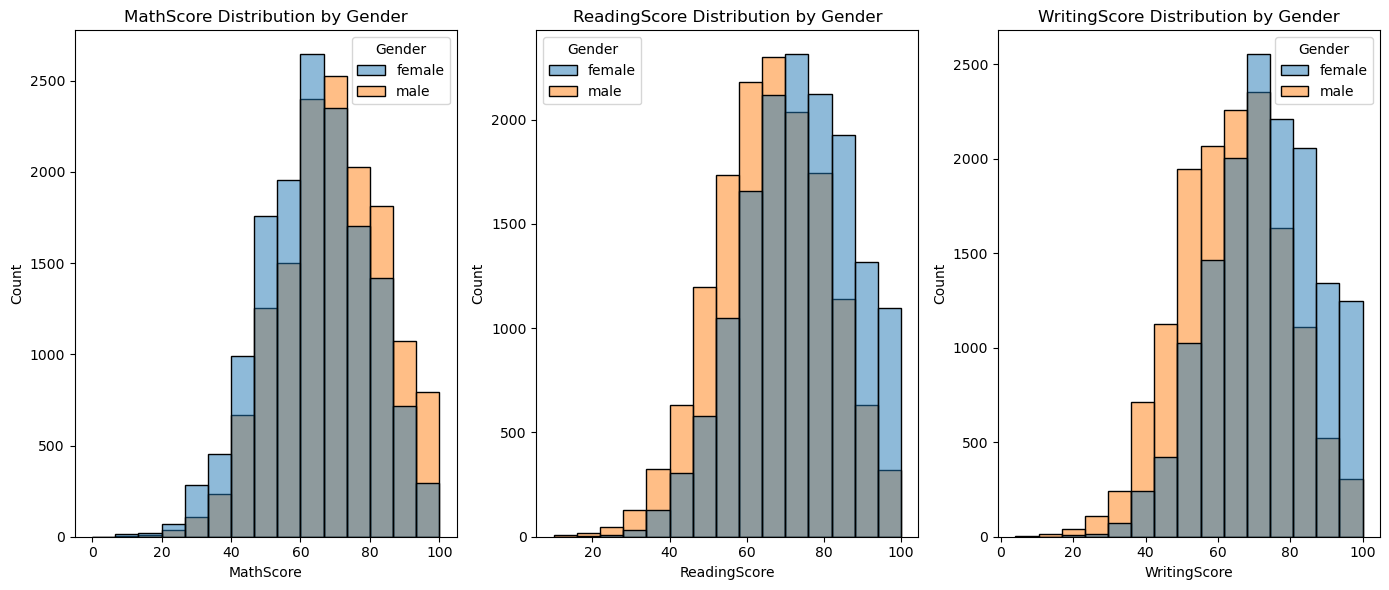

In [23]:
from scipy.stats import shapiro

#mathscore, mozemo nadodati i kde=True za liniju

male=df.Gender_male==1
male_scores=df.loc[male,'MathScore']
female_scores=df.loc[~male,'MathScore']
stat, p_M = shapiro(male_scores)
stat, p_F = shapiro(female_scores)
print('M:','stat=%.3f, p=%.3f' % (stat, p_M))
print('F:','stat=%.3f, p=%.3f' % (stat, p_F))

plt.figure(figsize=(14, 6))
plt.subplot(1, 3, 1)
sns.histplot(data=df, x='MathScore', hue='Gender', bins=15)
plt.title('MathScore Distribution by Gender')


#readingscore #row,column,subplot
male=df.Gender_male==1
maleScores=df.loc[male,'ReadingScore']
femaleScores=df.loc[~male,'ReadingScore']
stat, p_M = shapiro(maleScores)
stat, p_F = shapiro(femaleScores)
print('M:','stat=%.3f, p=%.3f' % (stat, p_M))
print('F:','stat=%.3f, p=%.3f' % (stat, p_F))
plt.subplot(1, 3, 2)
sns.histplot(data=df, x='ReadingScore', hue='Gender', bins=15)
plt.title('ReadingScore Distribution by Gender')

#writingscore 
male_Scores=df.loc[male,'WritingScore']
female_scores=df.loc[~male,'WritingScore']
stat, p_M = shapiro(male_Scores)
stat, p_F = shapiro(female_scores)
print('M:','stat=%.3f, p=%.3f' % (stat, p_M))
print('F:','stat=%.3f, p=%.3f' % (stat, p_F))
plt.subplot(1, 3, 3)
sns.histplot(data=df, x='WritingScore', hue='Gender', bins=15)
plt.title('WritingScore Distribution by Gender')

plt.tight_layout()
plt.show()